In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = [12, 4]
# matplotlib.rcParams["text.usetex"] =  True
plt.style.use("ggplot")

In [7]:
x = [i for i in range(1, 11)]
plurality_y = [0 for i in range(10)]
plurality_y[0] = 1
borda_y = [1 - (i / 10) for i in range(10)]

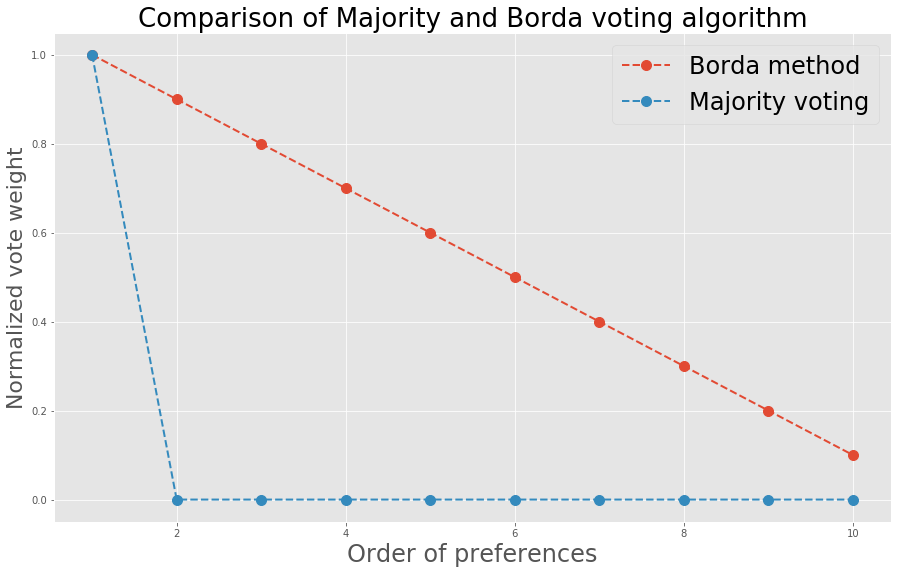

In [35]:
plt.figure(figsize=[15, 9])
plt.plot(
    x,
    borda_y,
    label="Borda method",
    marker="o",
    linestyle="--",
    markersize=10,
    linewidth=2,
)
plt.plot(
    x,
    plurality_y,
    label="Majority voting",
    marker="o",
    linestyle="--",
    markersize=10,
    linewidth=2,
)
plt.title("Comparison of Majority and Borda voting algorithm", fontsize=26)
plt.ylabel("Normalized vote weight", fontsize=22)
plt.xlabel("Order of preferences", fontsize=24)
plt.legend(fontsize=24)
plt.savefig("vote_weight_borda.svg")

In [22]:
decay_steps = 50
initial_learning_rate = 0.1
alpha = 0.004


def decayed_learning_rate(step):
    step = step % decay_steps
    cosine_decay = 0.5 * (1 + np.cos(np.pi * step / decay_steps))
    decayed = (1 - alpha) * cosine_decay + alpha
    return initial_learning_rate * decayed


a = [0.1 for _ in range(150)]
b = [0.02 for _ in range(75)]
c = [0.004 for _ in range(75)]
std_lr = a + b + c

lrs = [decayed_learning_rate(i) for i in range(300)]

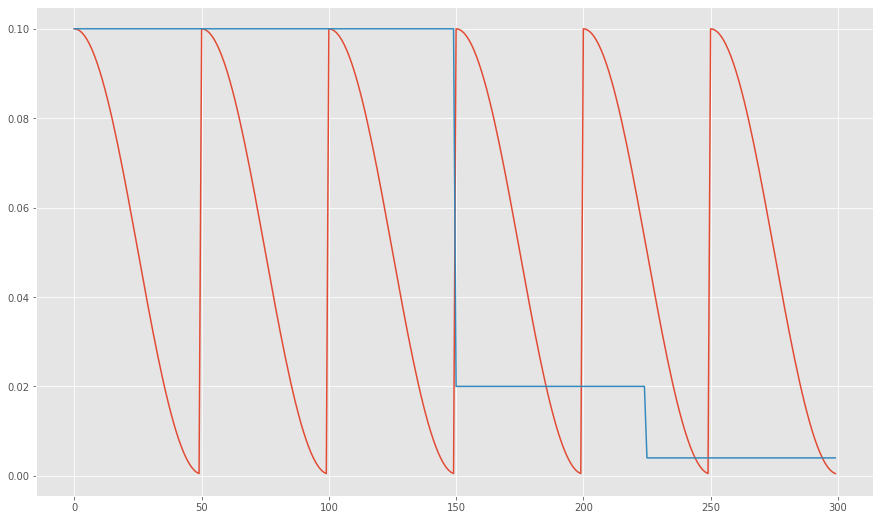

In [23]:
plt.figure(figsize=[15, 9])
plt.plot(lrs)
plt.plot(std_lr)

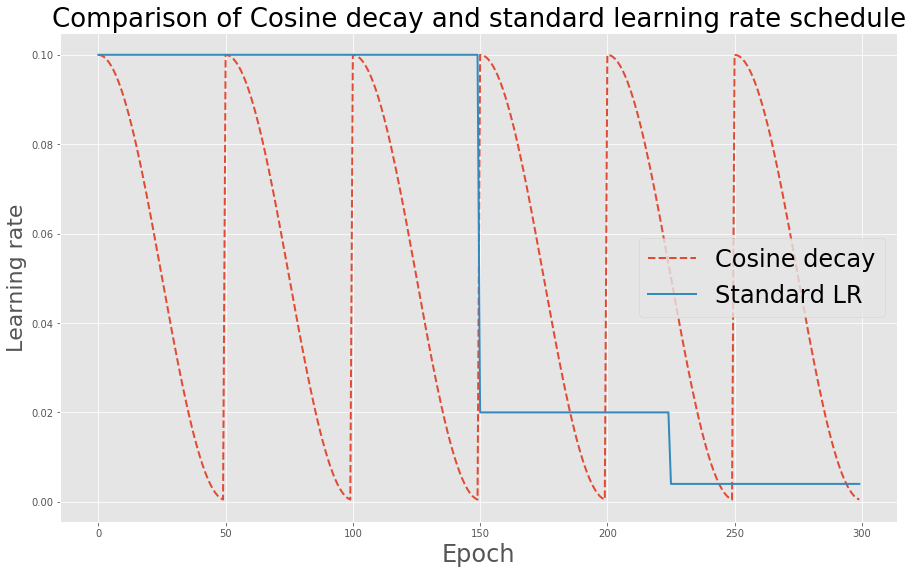

In [27]:
plt.figure(figsize=[15, 9])
plt.plot(lrs, label="Cosine decay", linestyle="--", linewidth=2)
plt.plot(std_lr, label="Standard LR", linewidth=2)
plt.title("Comparison of Cosine decay and standard learning rate schedule", fontsize=26)
plt.ylabel("Learning rate", fontsize=22)
plt.xlabel("Epoch", fontsize=24)
plt.legend(fontsize=24)
plt.savefig("snapshot_lr.svg")

<Figure size 1080x648 with 0 Axes>

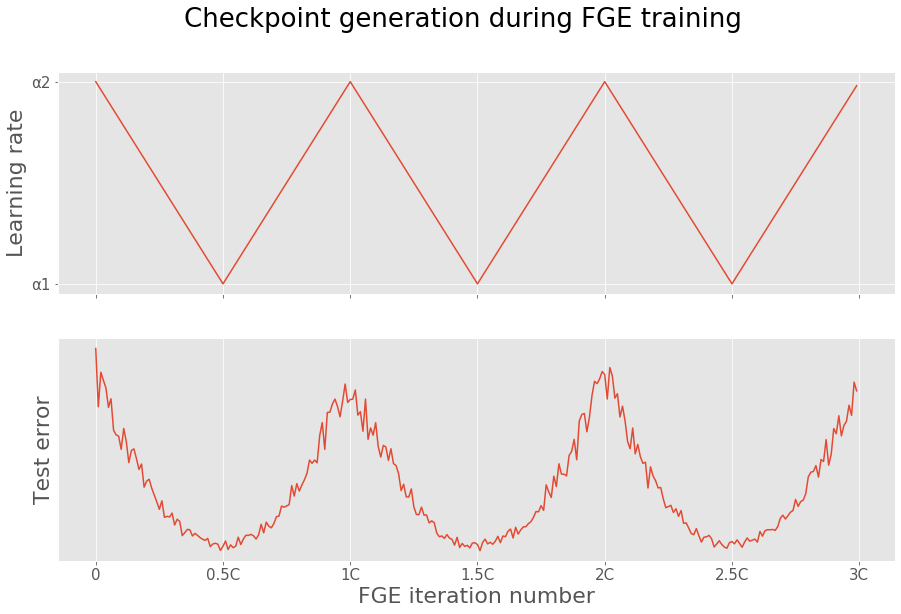

In [6]:
plt.figure(figsize=[15, 9])
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=[15, 9])

base_max = 1
base_min = 0
step = 100

lr_values = []

for i in range(300):
    i += step / 2
    step_phase = (i % step) / step
    if step_phase <= 0.5:
        value = base_min + (base_max - base_min) * (step_phase * 2)
    else:
        step_phase = step_phase * 2 - 1
        value = base_max - (base_max - base_min) * (step_phase)
    lr_values.append(value)

base_max = 35
base_min = 25
step = 100

loss_values = []

for i in range(300):
    step_phase = (i % step) / step
    value = (
        base_min
        + 10
        * (
            (step_phase - 0.5) ** 2
            + (abs(step_phase - 0.5)) ** 2 * 0.4 * np.random.rand()
        )
        + 0.2 * np.random.rand()
    )
    loss_values.append(value)

ticks = [0, 1]
ax1.set_yticks(ticks)
dic = {0: "α1", 1: "α2"}
labels = [ticks[i] if t not in dic.keys() else dic[t] for i, t in enumerate(ticks)]
ax1.set_yticklabels(labels, fontsize=15)

ticks = []
ax2.set_yticks(ticks)
ticks = [0, 50, 100, 150, 200, 250, 300]
ax2.set_xticks(ticks)
dic = {
    0: "0",
    50: "0.5C",
    100: "1C",
    150: "1.5C",
    200: "2C",
    250: "2.5C",
    300: "3C",
}
labels = [ticks[i] if t not in dic.keys() else dic[t] for i, t in enumerate(ticks)]
ax2.set_xticklabels(labels, fontsize=15)

ax1.plot(lr_values)
ax2.plot(loss_values)


f.suptitle("Checkpoint generation during FGE training", fontsize=26)
ax2.set_xlabel("FGE iteration number", fontsize=22)
ax2.set_ylabel("Test error", fontsize=22)
ax1.set_ylabel("Learning rate", fontsize=22)

plt.savefig("fge_lr.svg")